# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [6]:

iris_data = load_iris()



In [14]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

    #rename the column name so the dont include the '(cm)'
    df = df.rename({'sepal length (cm)':'sepal length','sepal width (cm)':'sepal width','petal length (cm)':'petal length','petal width (cm)':'petal width'},axis =1)

    #add 2 columns one with the target and another with the target_names
    df['target'] = iris_data.target
    df['class'] = iris_data.target_names[iris_data.target]
    return df
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
7,5.0,3.4,1.5,0.2,0,setosa
148,6.2,3.4,5.4,2.3,2,virginica
32,5.2,4.1,1.5,0.1,0,setosa
79,5.7,2.6,3.5,1.0,1,versicolor
116,6.5,3.0,5.5,1.8,2,virginica
97,6.2,2.9,4.3,1.3,1,versicolor
139,6.9,3.1,5.4,2.1,2,virginica
60,5.0,2.0,3.5,1.0,1,versicolor
147,6.5,3.0,5.2,2.0,2,virginica
70,5.9,3.2,4.8,1.8,1,versicolor


In [15]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [20]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = df_iris.values[:,0:4]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [28]:
mergings = 0 
# YOUR CODE HERE
samples = x
mergings = linkage(samples,method='complete')

In [23]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

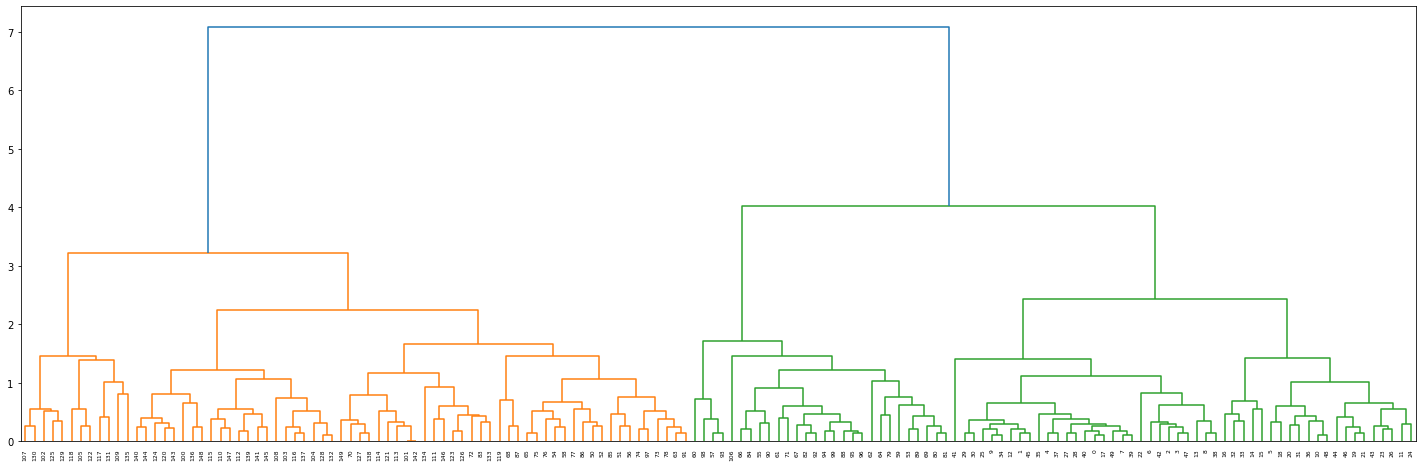

In [34]:
dn = 0
# YOUR CODE HERE
varieties = list(df_iris.index)
fig = plt.figure(figsize=(25, 8))
dn = dendrogram(mergings,leaf_rotation=90,leaf_font_size=6,labels=varieties)
plt.show()

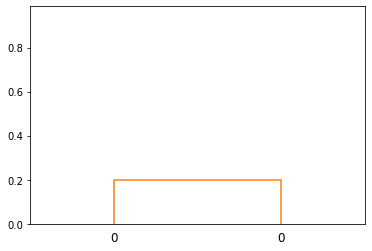

In [31]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [73]:
from sklearn.cluster import KMeans

df = pd.read_csv('D:/AI-Course/AI-Engineering/AI-Engineering/Chapter 2/02. Clustering/01. Hierarchical Clustering/datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('D:/AI-Course/AI-Engineering/AI-Engineering/Chapter 2/02. Clustering/01. Hierarchical Clustering/datasets/ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [74]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters=3)

In [75]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [76]:
# YOUR CODE HERE
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [77]:
# YOUR CODE HERE
labels = model.predict(points)
#labels

In [78]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [97]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # Simple Way
    #data_0 = points[labels==0]
    #data_1 = points[labels==1]
    #data_2 = points[labels==2]
    
    # Numpy Arrays
    for index in range(labels.shape[0]):
        if labels[index] == 0:
            data_0.append(points[index])
        elif labels[index] == 1:
            data_1.append(points[index])
        elif labels[index] == 2:
            data_2.append(points[index])
            
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)

    return data_0,data_1,data_2


data_0,data_1,data_2 =separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(111, 2)
(94, 2)
(95, 2)


In [72]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

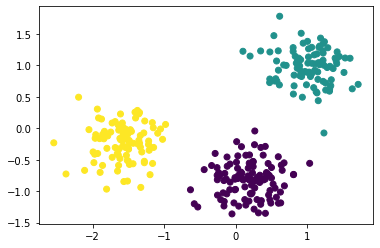

In [98]:
# plotting the data 

# YOUR CODE HERE
plt.scatter(points[:,0],points[:,1], c=labels)

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [100]:
# YOUR CODE HERE
new_labels= model.predict(new_points)

In [101]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [106]:
#separate the data by labels like we did before

new_0 = []
new_1 = []
new_2 = []

# YOUR CODE HERE

new_0,new_1,new_2 =separate_labels(new_labels, new_points)

In [103]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

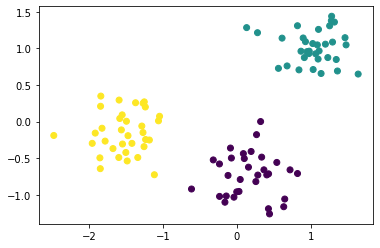

In [109]:
#plot the new labels

# YOUR CODE HERE
plt.scatter(new_points[:,0],new_points[:,1], c=new_labels)
plt.show()

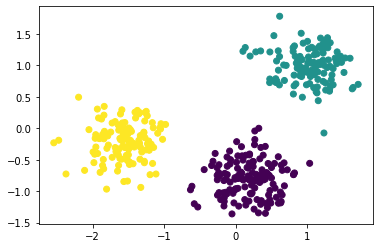

In [110]:
#plot all the points together

# YOUR CODE HERE
plt.scatter(points[:,0],points[:,1], c=labels)
plt.scatter(new_points[:,0],new_points[:,1], c=new_labels)
plt.show()